## Summarizing multivariate data - scikit-learn

Our goal is to reduce the dimensionality of our data without substantial loss of information. This will allows us to visualize previously high-dimensional datasets in two dimensions.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
sns.set_theme(style="whitegrid")

## The dataset
In an effort to pick a simple enough, but still multidimensional dataset, we decided on the [iris dataset](https://archive.ics.uci.edu/dataset/53/iris). The csv is provided in the assets folder.

The dataset consists of 150 measurements of 3 different species of flowers. Each sample contains four measurements in centimeters: petal width, petal length, sepal width and sepal length. The goal is to differentiate between the three species based on these measurements. 

**We suspect that we might be able to find a subset or a linear combination of the features, that would allow us to differentiate between the three species in just 2 dimensions.**

![alt text](assets/iris_targets.png)

In [2]:
# Load the iris dataset (also available from sklearn.datasets with load_iris)
iris_df = pd.read_csv('assets/iris.csv')
iris_df

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

Let's start with a brute-force pairplot between all the features.

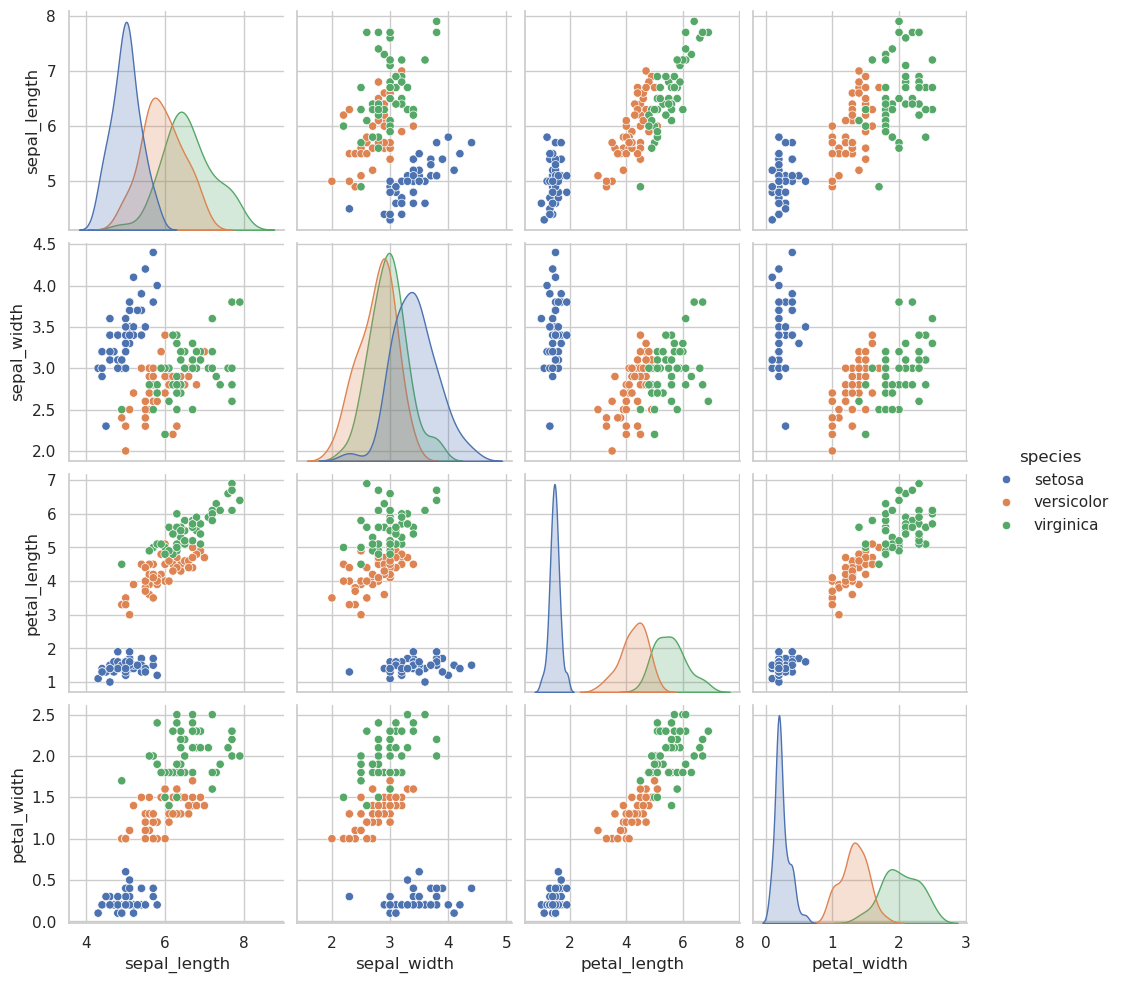

In [3]:
sns.pairplot(iris_df, hue='species')

- Setosa seems the easiest to differentiate
- The other two species (versicolor, virginica) have some overlap in more or less all pairs, the most promising pair seems petal_width and petal_length.
- Note that here we have the luxury of a small enough number of features that explain a lot of the dataset in pairs.

## Scikit-learn

A de-facto standard library for machine learning in the data science Python ecosystem. It has a very consistent api, with plenty of machine learning models, preprocessing steps and metrics already implemented.

The [offical getting started guide](https://scikit-learn.org/stable/getting_started.html) provides a great high-level overview.

`pip install scikit-learn` or, `conda install scikit-learn`

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


## Principal Component Analysis ([PCA](https://fri-datascience.github.io/course_ids/handbook/multivariate-data-chapter.html#principal-component-analysis-pca))
### Key-facts
- the default first try for dimensionality reduction.
- PCA computes a projection!
- Principal components are ordered! The first one explains as much variance as possible.
- Principal components are orthogonal to each other.
- Each principal component is a linear combination of the original features.
- As it tries to explain variance, it is sensitive to relative scales of the variables

### Scaling

Before computing PCA we should always take a look at the scale of the data. A great way is to compute some summary statistics.

In [5]:
display(iris_df.head())
iris_df.describe()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Some questions for the future when you will be dealing with predictive modeling:
- When should we standaridze the data (mean=0 and variance=1)?
- Does it matter on which subset of the data we compute the original transformation? Do we do it on all data? On training data? Both separately?

In [6]:
# Standardize the data (mean=0, variance=1).
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df.drop(columns='species')) # why fit_transform? when to use just fit and on what subsets?
print(scaler.mean_, scaler.scale_)
print(iris_scaled.mean(axis=0).round(5), iris_scaled.std(axis=0))

[5.84333333 3.054      3.75866667 1.19866667] [0.82530129 0.43214658 1.75852918 0.76061262]
[-0. -0.  0. -0.] [1. 1. 1. 1.]


Scikit-learn tip: the attributes that end with an underscore `_` are only available after fitting (training) a particular model/scaler/etc.

This will be your usual workflow with sklearn. You instantiate a model (in this case `PCA()`), you fit it on some data `model.fit(data)` and then you use it to predict/transform/etc. with `model.predict(new_data)`, `model.transform(some_data)`

In [7]:
pca = PCA() # by default, PCA computes as many components as possible (4 in this case), can you give an upper bound in general?
pca.fit(iris_scaled) # why fit_transform? when to use just fit and on what subsets? Could we use fit_transform here?

# Notice the _ at the end of the attribute names.
print(pca.components_) # principal components are returned as row vectors and are linear combinations of the original features

# Let's show principal components in a dataframe:
components = pd.DataFrame(pca.components_, columns=iris_df.columns[:-1], index=[f'PC{i+1}' for i in range(pca.n_components_)])
display(components) # why display? what's the difference with print?


[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]
 [ 0.72101681 -0.24203288 -0.14089226 -0.6338014 ]
 [-0.26199559  0.12413481  0.80115427 -0.52354627]]


sepal_length  sepal_width  petal_length  petal_width
PC1      0.522372    -0.263355      0.581254     0.565611
PC2      0.372318     0.925556      0.021095     0.065416
PC3      0.721017    -0.242033     -0.140892    -0.633801
PC4     -0.261996     0.124135      0.801154    -0.523546

### How many principal components to choose?
The goal is to explain as much variance with as little principal components as possible. The standard is to choose the first two principal components and use them as new axes of the coordinate system and project the data. Additionally, one might display other principal components too in a biplot as shown in the [handbook](https://fri-datascience.github.io/course_ids/handbook/multivariate-data-chapter.html#principal-component-analysis-pca).

If we approach this more formally, we can take a look at the explained variance ratio of each principal component to determine a good tradeoff between number of dimensions and explained variance.

In [8]:
# Show explained variance
print(pca.explained_variance_ratio_)    # explained variance of the data ratio per component

[0.72770452 0.23030523 0.03683832 0.00515193]


[0.72770452 0.95800975 0.99484807 1.        ]
[0.72770452 0.23030523 0.03683832 0.00515193]


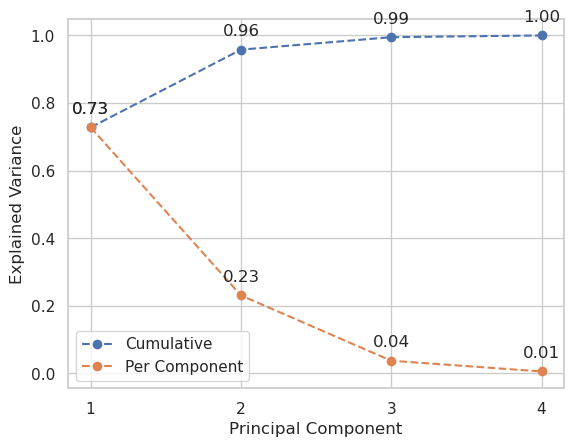

In [9]:
fig, ax = plt.subplots(1,1, sharex=True, sharey=True)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
per_component_explained_variance = pca.explained_variance_ratio_
print(cumulative_explained_variance)
print(per_component_explained_variance)
ax.plot(range(1, pca.n_components_+1), cumulative_explained_variance, marker='o', linestyle='--', label='Cumulative')
ax.plot(range(1, pca.n_components_+1), per_component_explained_variance, marker='o', linestyle='--', label='Per Component')
ax.legend()
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
ax.set_xticks(range(1, pca.n_components_+1))
# text labels
for i in range(pca.n_components_):
    ax.annotate(f'{per_component_explained_variance[i]:.2f}', (i+1, per_component_explained_variance[i]), textcoords="offset points", xytext=(0,10), ha='center')
    ax.annotate(f'{cumulative_explained_variance[i]:.2f}', (i+1, cumulative_explained_variance[i]), textcoords="offset points", xytext=(0,10), ha='center')


- With only 1 component, we were able to explain 73% of the variance of the data.
- Technically, we can project the whole dataset (150rowsx4features) onto the first or the first two components and keep just that. Which would reduce the size (and dimensionality) by 75% or 50% respectively.

In [10]:
# lets project the data
iris_pca = pca.transform(iris_scaled)
iris_pca = pd.DataFrame(iris_pca, columns=[f'PC{i}' for i in range(1, pca.n_components_+1)])
iris_pca['species'] = iris_df['species']
iris_pca

PC1       PC2       PC3       PC4    species
0   -2.264542  0.505704  0.121943 -0.023073     setosa
1   -2.086426 -0.655405  0.227251 -0.103208     setosa
2   -2.367950 -0.318477 -0.051480 -0.027825     setosa
3   -2.304197 -0.575368 -0.098860  0.066311     setosa
4   -2.388777  0.674767 -0.021428  0.037397     setosa
..        ...       ...       ...       ...        ...
145  1.870522  0.382822 -0.254532 -0.388890  virginica
146  1.558492 -0.905314  0.025382 -0.221322  virginica
147  1.520845  0.266795 -0.179277 -0.118903  virginica
148  1.376391  1.016362 -0.931405 -0.024146  virginica
149  0.959299 -0.022284 -0.528794  0.163676  virginica

[150 rows x 5 columns]

### Projected data visualization

Text(0, 0.5, 'PC2: 23%')

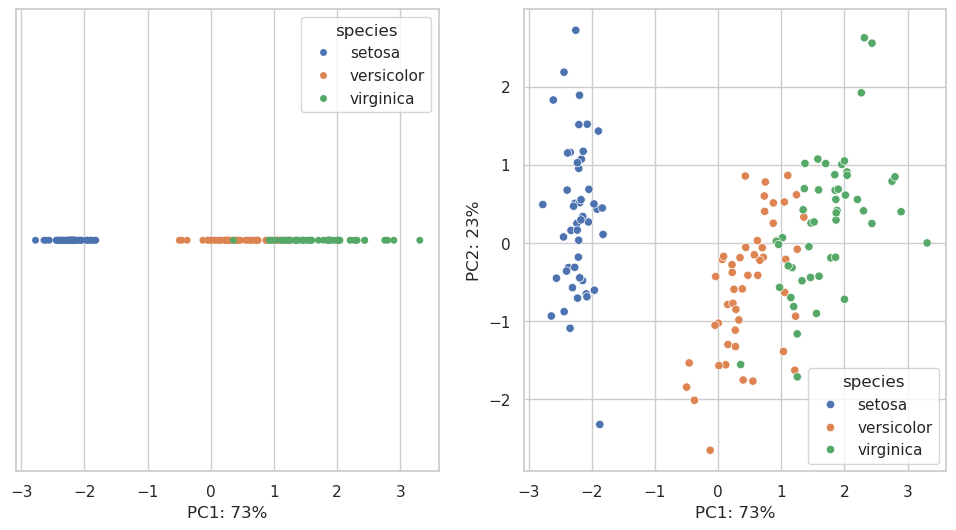

In [11]:
# jitter the data on the x axis and plot just first component
fig, ax = plt.subplots(1,2, figsize=(12,6), sharex=True)
p1_lab = f"PC1: {round(pca.explained_variance_ratio_[0] * 100)}%"
p2_lab = f"PC2: {round(pca.explained_variance_ratio_[1] * 100)}%"
sns.stripplot(data=iris_pca, x='PC1', hue='species', ax=ax[0], jitter=False)
sns.scatterplot(data=iris_pca, x='PC1', y='PC2', hue='species', ax=ax[1])
ax[0].set_xlabel(p1_lab)
ax[1].set_xlabel(p1_lab)
ax[1].set_ylabel(p2_lab)

- Should we treat the PC1 and PC2 axes the same (in terms of *strength*)?
- Can we add new data without recomputing PC?
- If you are interested: before reading the below paper, could you think of a way to apply what we learned to do face recognition or generate faces?
- For a real high-dimensional application of PCA from 1991 you can check out [Eigenfaces for face recognition](https://direct.mit.edu/jocn/article-abstract/3/1/71/3025).

## Multi-Dimensional Scaling - MDS ([scikit docs](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html))
- based on the idea of representing the original data in a lower (typically 2-dimensional) space in a way that best preserves the distances between observations in the original space. This is why it's sensitive to the distance metric chosen along with the scale of the variables!
- embedding, not a projection - notice how sklearn only has fit() and fit_transform(), but not transform()!
- only distances between the samples (vectors) are needed
- scikit can precompute the distance matrix (by default with a euclidean distance).

[[0.         1.18212094 0.84856711 ... 3.80606726 3.82448796 3.33620324]
 [1.18212094 0.         0.52549943 ... 3.74544575 4.01679443 3.21249253]
 [0.84856711 0.52549943 0.         ... 3.93572117 4.07138458 3.37976603]
 ...
 [3.80606726 3.74544575 3.93572117 ... 0.         1.07582215 0.77518629]
 [3.82448796 4.01679443 4.07138458 ... 1.07582215 0.         1.20421099]
 [3.33620324 3.21249253 3.37976603 ... 0.77518629 1.20421099 0.        ]]


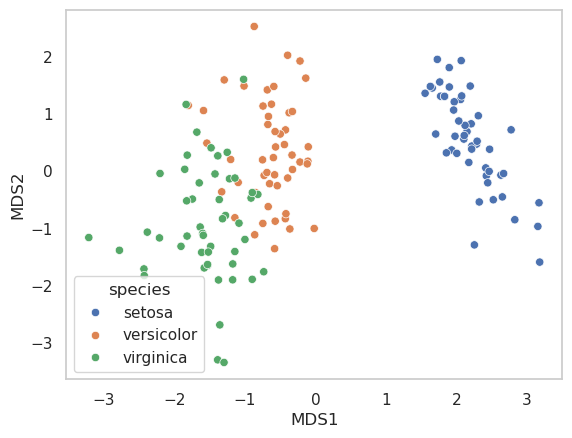

In [12]:
from sklearn.manifold import MDS
mds = MDS(n_components=2, dissimilarity="euclidean") # automatically computes dissimalrity matrix, unless we manually specify it
iris_embeddings = mds.fit_transform(iris_scaled)
print(mds.dissimilarity_matrix_)
iris_embeddings = pd.DataFrame(iris_embeddings, columns=['MDS1', 'MDS2'])
iris_embeddings['species'] = iris_df['species']
ax = sns.scatterplot(data=iris_embeddings, x='MDS1', y='MDS2', hue='species')
ax.grid(False)

## t-distributed Stochastic Neighbor Embedding - TSNE ([scikit docs](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html))
- The key idea is to minimize the divergence between a distribution that measures pairwise similarities of the input objects and a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding.
- non-linear
- new advancements [have enabled embedding new samples without recomputing](https://github.com/pavlin-policar/openTSNE) 
- DON'T cluster what T-SNE returns! Here we overlay the original labels, just to see how sensitive T-SNE is to perplexity. The input features are no longer identifiable in the embedding, so inference can not be done only with t-SNE output.
- has a very sensitive `perplexity` hyperparameter that *should* be related with the number of nearest-neighbors in other techniques.

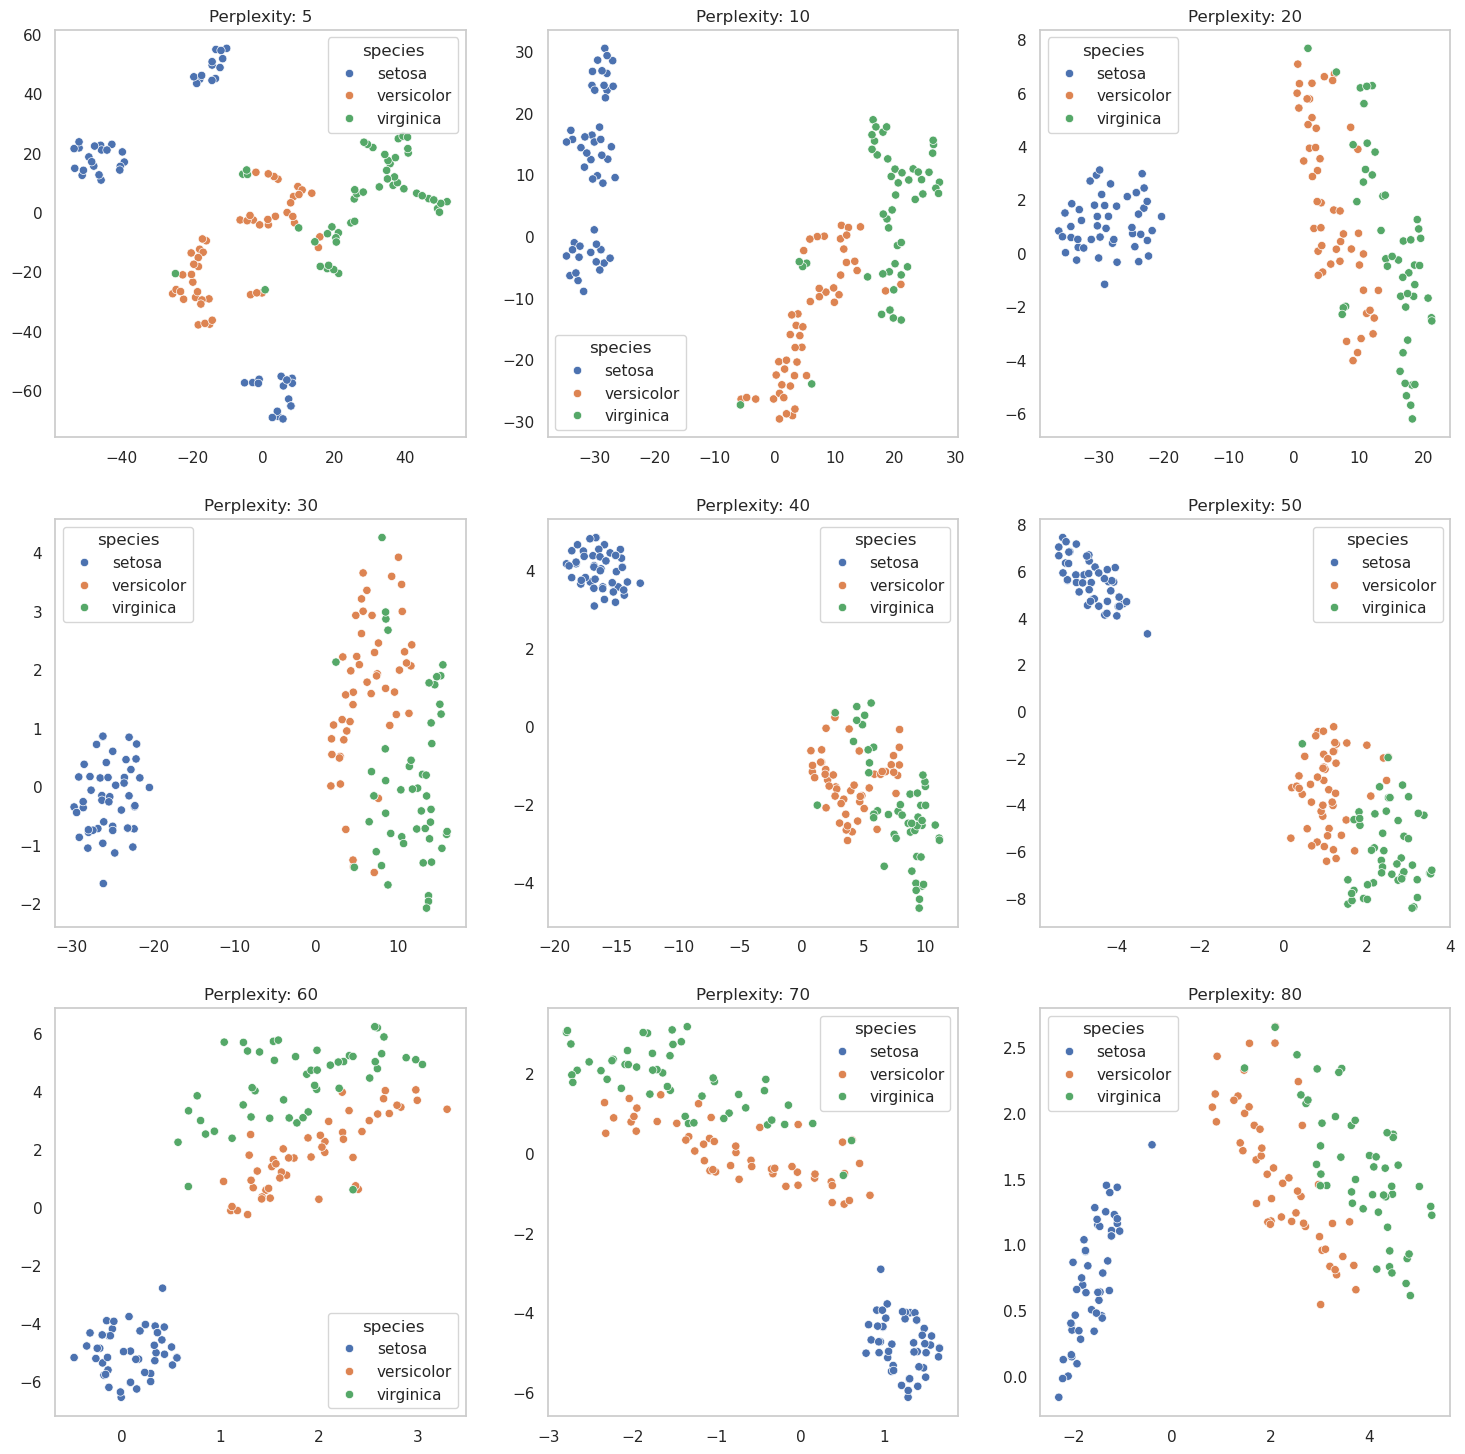

In [13]:
from sklearn.manifold import TSNE

# try some different perplexities
fig, ax = plt.subplots(3,3, figsize=(18,18))
for ix, perplexity in enumerate([5, 10, 20, 30, 40, 50, 60, 70, 80]):
    tsne = TSNE(n_components=2, perplexity=perplexity, max_iter=1000, random_state=42) # again, works with distances!
    iris_tsne = tsne.fit_transform(iris_scaled)
    iris_tsne = pd.DataFrame(iris_tsne, columns=['TSNE1', 'TSNE2'])
    iris_tsne['species'] = iris_df['species']
    sns.scatterplot(data=iris_tsne, x='TSNE1', y='TSNE2', hue='species', ax=ax[ix//3, ix%3])
    ax[ix//3, ix%3].set_title(f'Perplexity: {perplexity}')
    # turn off grid
    ax[ix//3, ix%3].grid(False)
    ax[ix//3, ix%3].set_xlabel('')
    ax[ix//3, ix%3].set_ylabel('')



Show in Orange if there's time.